> <h1><center> Analisis Regresión No Lineal</center></h1>


- Si los datos muestran una tendencia curvilinea, entonces la Regresion Lineal no mostrará presición en los resultados en comparación a una Regresion No Lineal porque, como su nombre lo indica, La Regresión Lineal considera que los datos son lineales. 

- En este micro-proyecto vamos a aplicar Regresión no Lineal en un ejemplo, el cual ajustaremos a un modelo no lineal a los puntos de datos correspondientes al Dataset  China´s GDP de 1960 a 2014

> - ## Importando los paquetes necesarios

In [14]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

- Aunque la Regresion Lineal es muy buena para resolver muchos problemas, este no puede ser usado para todos los datasets. Primero recordemos como la Regresion Lineal, podría modelar un dataset, este modela una relacion lineal entre una variable dependiente **y** una variable independiente **x**. Este tenia una ecuacion simple, de grado 1, por ejemplo; 

> **y = $2x$ + 3.**

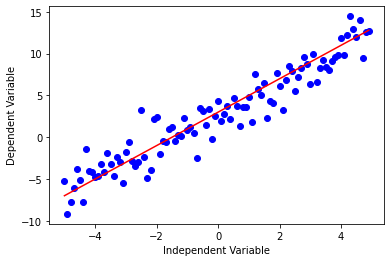

In [27]:
x = np.arange(-5.0, 5.0, 0.1)

#Se puede ajustar la pendiente y el intercepto para verificar los cambios en el grafico
y = 2*(x) + 3
y_noise = 2 * np.random.normal(size=x.size)
ydata = y + y_noise

plt.plot(x, ydata, 'bo')
plt.plot(x,y, 'r')
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

- Las Regresiones No Lineales son una relacion entre las variables independientes *x* y una variable dependiente *Y*, el cual resulta en una función no lineal modelada en los datos. Esencialmente cualquier relacion que sea no lineal puede ser llamado como NON-LINEAR, y es usualmente representada por un polinomio de **k** grados:

$$ \\ y = a x^3 + b x^2 + c x + d \\ $$

Las funciones Non-Linear pueden tener elementos como exponenciales, logaritmicos, fracciones, y otros. Por ejemplo:  $$ y = log(x)$$

O incluso, mas complejas como: 

$$ y = log(a x^3 + b x^2 + c x + d)$$

- Vamos a echar un vistazo a la grafica de una funcion cubica:

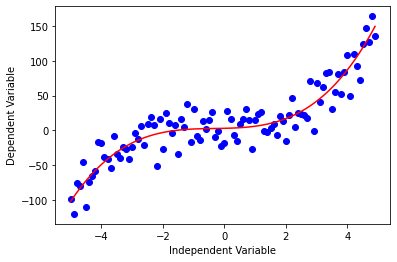

In [26]:
x = np.arange(-5.0, 5.0, 0.1)

y = 1*(x**3) + 1*(x**2) + 1*x + 3
y_noise = 20 * np.random.normal(size=x.size)
ydata = y + y_noise
plt.plot(x, ydata, 'bo')
plt.plot(x, y, 'r')
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

- Como se puede ver, esta funcion tiene  $x^3$ y $x^2$ como variables independientes. Ademas, el grafico de esta funcion no es una línea recta sobre el plano 2D. Por lo tanto esta es una funcion non-linear. 

- Algunos otros tipos de funcion non-linear son: 

### Quadratic

$$ Y = X^2 $$

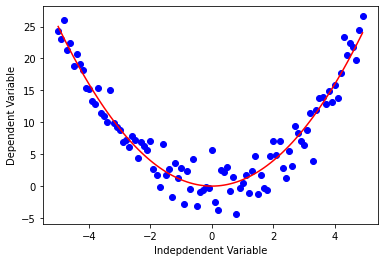

In [17]:
x = np.arange(-5.0, 5.0, 0.1)

y = np.power(x,2)
y_noise = 2 * np.random.normal(size=x.size)
ydata = y + y_noise
plt.plot(x, ydata,  'bo')
plt.plot(x,y, 'r') 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show() 

### Exponential

Una funcion exponencial con base c esta definida por: $$ Y = a + b c^X$$ donde b ≠0, c > 0 , c ≠1, y "x" es cualquier numero real. La base, c, es constante y el exponente x, es una variable 

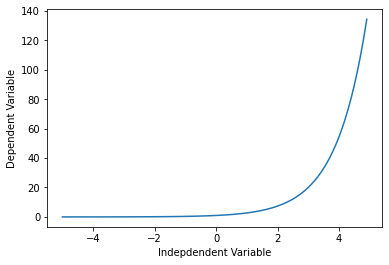

In [18]:
X = np.arange(-5.0, 5.0, 0.1)

##You can adjust the slope and intercept to verify the changes in the graph

Y= np.exp(X)

plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

### Logaritmica

Ek resultado **y** es un resultado de aplicar mapeo logaritmico de la intrada **x**`s` a la variable de salida **y**. Esta es una de las mas simple formas de **log()**:   $$ y = log(x)$$

Porfavor considerar que en lugar de $x$, podemos usar $X$, el cual puede ser una representacion polinomial de $x$'s. 

y = log(X)

C:\Users\Tera\AppData\Local\Temp/ipykernel_6016/945852816.py:3: RuntimeWarning: invalid value encountered in log
  Y = np.log(X)


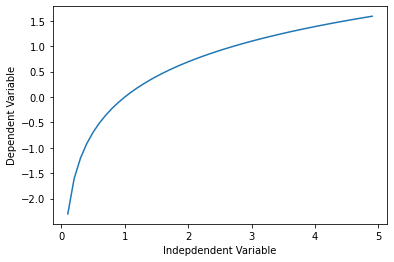

In [19]:
X = np.arange(-5.0, 5.0, 0.1)

Y = np.log(X)

plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

### Sigmoidal/Logistic


$$ Y = a + \frac{b}{1+ c^{(X-d)}}$$

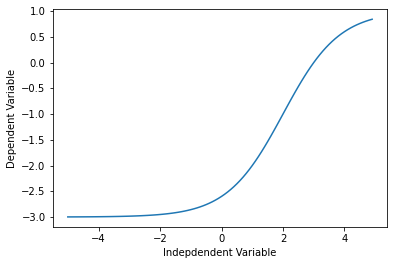

In [20]:
X = np.arange(-5.0, 5.0, 0.1)

Y = 1-4/(1+np.power(3, X-2))

plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

<a id="ref2"></a>

> # Ejemplo de Non-Linear Regression

- Para este ejemplo, vamos a ajustar un modelo no lineal a los puntos de datos correspondientes a `*China´s GDP de 1960 a 2014*`. En el dataset tendremos dos columnas, la primera corresponde a los años entre 1960 y 2014, y la segunda a China's corresponde al Ingreso Interno Brito anual en dolares US para ese año. 

In [23]:
import numpy as np
import pandas as pd

df = pd.read_csv("china_gdp.csv")
df.head(10)


,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10
5,1965,6.970915e+10
6,1966,7.587943e+10
7,1967,7.205703e+10
8,1968,6.999350e+10
9,1969,7.871882e+10


### Graficando el Dataset

Asi es como se ven los puntos de datos. Se parece a una funcion Logistica o exponencial. El crecimiento comienza muy bajo, luego desde 2005 en adelante, el crecimiento es muy significativo. Y finalmente, este desacelera lentamente in el año 2010 en adelante.


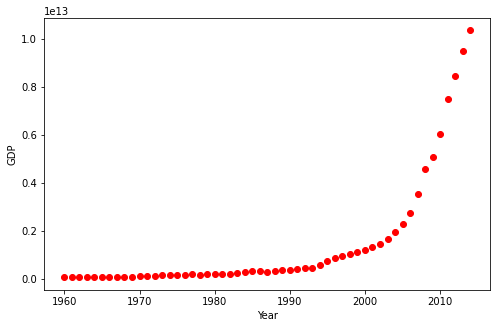

In [24]:
plt.figure(figsize=(8,5))
x_data, y_data = (df["Year"].values, df["Value"].values)
plt.plot(x_data, y_data, 'ro')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

> ### Eligiendo un Modelo

Al revisar la grafica, determinamos que la funcion logistica podría ser una buena aproximación, ya que tiene la propiedad de arrancar con un crecimiento lento, incrementando el crecimiento en el medio, y luego decrementando nuevamente hasta el final.

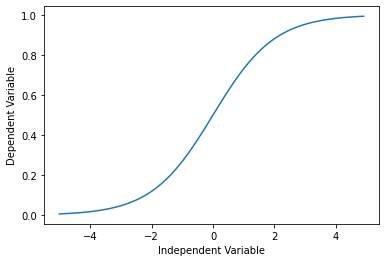

In [25]:
X = np.arange(-5.0, 5.0, 0.1)
Y = 1.0 / (1.0 + np.exp(-X))

plt.plot(X, Y)
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

- La fórmula para la función logistica es la siguiente:

$$\hat{Y} = \frac1{1+e^{\beta_1(X-\beta_2)}}$$

$beta_1$: Controls the curve's steepness,

$beta_2$: Slides the curve on the x-axis.

### Construcción del Modelo

- Ahora, vamos a construir nuestro modelo de Regresion e inicializar los parametros.

In [28]:
def sigmoid(x, Beta_1, Beta_2):
    y = 1 / (1 + np.exp(-Beta_1*(x-Beta_2)))
    return y

- Veamos una muestra sigmoid line que podría ajustar los datos:

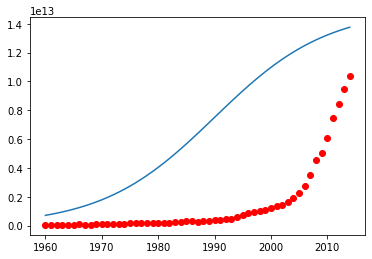

In [34]:
beta_1 = 0.10
beta_2 = 1990.0

#Logistic function
Y_pred = sigmoid(x_data, beta_1, beta_2)

#plot initial prediction against datapoints
plt.plot(x_data, Y_pred*15000000000000.)
plt.plot(x_data, y_data, 'ro')

- NUestra tarea aqui es encontrar los mejores parametros para nuestro modelo. Comenzemos normalizando nuestros "x" y "y":

In [35]:
#Normalizamos nuestros datos
xdata = x_data/max(x_data)
ydata = y_data/max(y_data)

> ### Como encontramos los mejores parametros para nuestra linea de ajuste? 

- Podemos usar la función **curve_fit** el cual utiliza minimos cuadrados no lineales para ajustar nuestra funcion Sigmoide a los datos. 

popt son nuestros parametros optimizados.

In [36]:
from scipy.optimize import curve_fit
popt, pcov = curve_fit(sigmoid, xdata, ydata)

#print los parametros finales
print(" beta_1 = %f, beta_2 = %f" % (popt[0], popt[1]))

 beta_1 = 690.451711, beta_2 = 0.997207


- Ahora graficamos nuestros resultados del Modelo de Regresion.

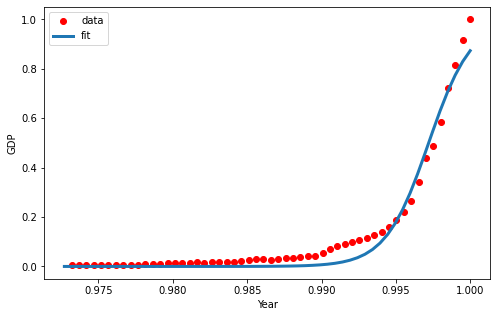

In [38]:
x = np.linspace(1960, 2015, 55)
x = x/max(x)
plt.figure(figsize=(8,5))
y = sigmoid(x, *popt)
plt.plot(xdata, ydata, 'ro', label='data')
plt.plot(x,y, linewidth=3.0, label='fit')
plt.legend(loc='best')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

## Practice

Calcular cual es la presición del Modelo

In [42]:
#Dividir los datos en train/test

msk = np.random.rand(len(df)) < 0.8
train_x = xdata[msk]
test_x = xdata[~msk]
train_y = ydata[msk]
test_y = ydata[~msk]

# Construccion del modelo usando train set
popt, pcov = curve_fit(sigmoid, train_x, train_y)

# Prediccion del modelo usando test set
y_hat = sigmoid(test_x, *popt)

# Evaluacion del modelo
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_hat - test_y) ** 2))
from sklearn.metrics import r2_score
print("R2-score: %.2f" % r2_score(y_hat , test_y) )

Mean absolute error: 0.13
Residual sum of squares (MSE): 0.08
R2-score: -662848769454535360905216.00
